In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from processing_data import *

In [96]:
root_path = os.path.abspath(os.path.join(os.getcwd(), '../..'))
file_path = os.path.join(root_path, os.path.join('model', 'asdf_single_space_log.csv'))

In [97]:
x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']]
y_names = ['a', 's', 'd', 'f','None']

col_names = x_names + y_names

df = pd.read_csv(file_path,names=col_names)

In [98]:
y_names_origin = ['a', 's', 'd', 'f']

for row in range(len(df)):
    df['None'].iloc[row] = 1
    for value in df[y_names_origin].iloc[row]:
        if value == 1:
            df['None'].iloc[row] = 0
            break

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [94]:
df = preprocess(df,x_names, gamma = 0.4)

KeyboardInterrupt: 

In [73]:
# p_df = df.copy()

# cut_df = cut_outlier(df, x_names)
# # p_df = preprocess(df,x_names, gamma=0.4)

In [74]:
# gamma = 0.4
# gamma_df = gamma_smoothing(cut_df, gamma, x_names)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [75]:
# minmax_df = MinMaxScaler(gamma_df, x_names)

In [76]:
x, y = df[x_names], df[y_names]

In [89]:
train_test_ratio = 0.95

train_num = int(len(df) * train_test_ratio)

x_train, x_test = x[:train_num], x[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

x_train_numpy = x_train.to_numpy()
x_test_numpy = x_test.to_numpy()
y_train_numpy = y_train.to_numpy()
y_test_numpy = y_test.to_numpy()

In [90]:
x_train_t = x_train_numpy.reshape(x_train_numpy.shape[0],63,1)
x_test_t = x_test_numpy.reshape(x_test_numpy.shape[0],63,1)

In [91]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [92]:
model = Sequential()

model.add(LSTM(50, input_shape=(63,1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                3264      
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 325       
Total params: 13,989
Trainable params: 13,989
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.fit(x_train_t, y_train, epochs=20)

Epoch 1/20
535/535 [==============================] - 8s 12ms/step - loss: 1.2528 - accuracy: 0.5912
Epoch 2/20
535/535 [==============================] - 6s 11ms/step - loss: 1.2457 - accuracy: 0.5912
Epoch 3/20
535/535 [==============================] - 6s 11ms/step - loss: 1.2453 - accuracy: 0.5912
Epoch 4/20
535/535 [==============================] - 6s 11ms/step - loss: 1.2444 - accuracy: 0.5912
Epoch 5/20
535/535 [==============================] - 6s 11ms/step - loss: 1.2440 - accuracy: 0.5912
Epoch 6/20
535/535 [==============================] - 6s 11ms/step - loss: 1.2441 - accuracy: 0.5912
Epoch 7/20
535/535 [==============================] - 6s 11ms/step - loss: 1.2436 - accuracy: 0.5912
Epoch 8/20
535/535 [==============================] - 6s 11ms/step - loss: 1.2431 - accuracy: 0.5912
Epoch 9/20
535/535 [==============================] - 6s 11ms/step - loss: 1.2403 - accuracy: 0.5912
Epoch 10/20
535/535 [==============================] - 6s 10ms/step - loss: 1.2192 - accura

In [82]:
model.evaluate(x_test_t, y_test, verbose=2)

57/57 - 1s - loss: 0.8011 - accuracy: 0.6968


[0.8010737895965576, 0.6968351006507874]

In [83]:
predict = model.predict(x_test_t)

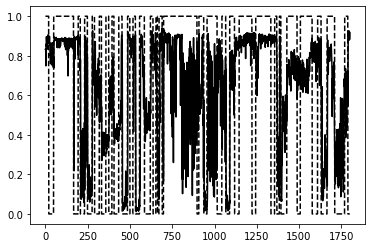

In [84]:
size = len(y_test)

plt.plot(range(size), y_test['None'], 'k--')
plt.plot(range(size), predict[:,4],'k')

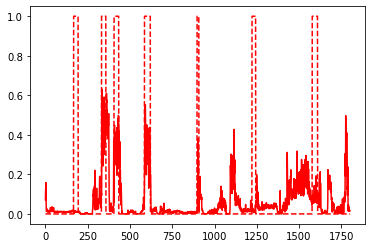

In [85]:
plt.plot(range(size), y_test['a'], 'r--')
plt.plot(range(size), predict[:,0],'r')

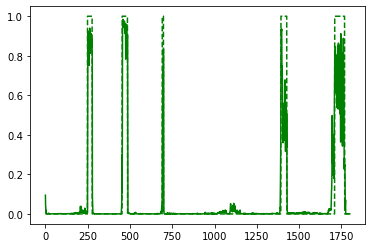

In [86]:
plt.plot(range(size), y_test['s'], 'g--')
plt.plot(range(size), predict[:,1],'g')

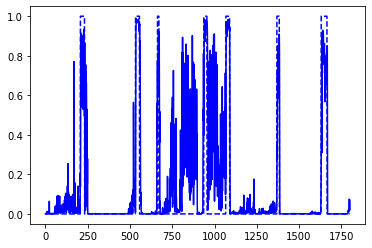

In [87]:
plt.plot(range(size), y_test['d'], 'b--')
plt.plot(range(size), predict[:,2],'b')

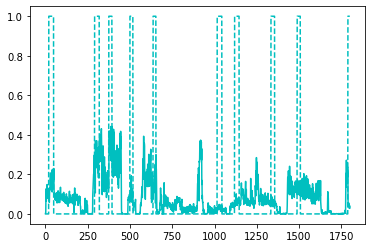

In [88]:
plt.plot(range(size), y_test['f'], 'c--')
plt.plot(range(size), predict[:,3],'c')